In [10]:
import tensorflow as tf
from tensorflow import keras as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
n_train = 100
n_test = 100
w_true = tf.constant([1.2, -3.4, 5.6], shape=(3,1), dtype=tf.float32)
b_true = tf.constant(5.0)
print(w_true, b_true)
features = tf.random.normal((n_train + n_test, 1))
X = tf.concat([
    features, 
    tf.pow(features, 2), 
    tf.pow(features, 3),
], axis=1)
print(X.shape)
y = tf.matmul(X, w_true) + b_true + tf.random.normal((X.shape[0], 1), 0, 0.1)
print(y.shape)

tf.Tensor(
[[ 1.2]
 [-3.4]
 [ 5.6]], shape=(3, 1), dtype=float32) tf.Tensor(5.0, shape=(), dtype=float32)
(200, 3)
(200, 1)


In [9]:

def semilogy(x_vals, y_vals, x_label, y_label, 
             x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    from IPython import display
    display.set_matplotlib_formats('svg')
    plt.rcParams['figure.figsize'] = figsize
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
    plt.show()


In [18]:
num_of_epochs = 100
loss = tf.losses.MeanSquaredError()

def fit_and_plot(X_train, y_train, X_test, y_test):
    net = K.Sequential([
        K.layers.Dense(1)
    ])
    batch_size = min(10, y_train.shape[0])
    train_iter = tf.data.Dataset.from_tensor_slices(
        (X_train, y_train)
    ).batch(batch_size)
    test_iter = tf.data.Dataset.from_tensor_slices(
        (X_test, y_test)
    ).batch(batch_size)
    opt = K.optimizers.SGD(0.01)
    train_loss = []
    test_loss = []
    for ep in range(num_of_epochs):
        for X_tmp, y_tmp in train_iter:
            with tf.GradientTape() as tape:
                loss1 = loss(y_tmp, net(X_tmp))
            grads = tape.gradient(loss1, net.trainable_variables)
            opt.apply_gradients(zip(grads, net.trainable_variables))
        train_loss.append(loss(y_train, net(X_train)).numpy().mean())
        test_loss.append(loss(y_test, net(X_test)).numpy().mean())
    print('final epoch: train loss: {}, test loss: {}'.format(train_loss[-1], test_loss[-1]))
    semilogy(
        range(1, num_of_epochs + 1), train_loss, 'epochs', 'loss', 
        range(1, num_of_epochs + 1), test_loss, ['train', 'test']
    )
    print('weight: ', net.get_weights()[0], '\nbias: ', net.get_weights()[1])

final epoch: train loss: 0.012692313641309738, test loss: 0.00998257752507925


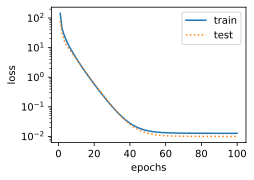

weight:  [[ 1.1547341]
 [-3.3751447]
 [ 5.6091266]] 
bias:  [4.982065]


In [19]:
fit_and_plot(X[:n_train, :], y[:n_train], X[n_train: , :],  y[n_train:])

final epoch: train loss: 294.9061279296875, test loss: 261.890380859375


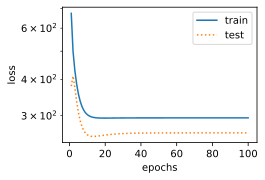

weight:  [[ 14.363519]
 [-17.41873 ]] 
bias:  [16.365578]


In [22]:
fit_and_plot(
    X[:n_train, :2], y[:n_train, :], 
    X[n_train:, :2], y[n_train:, :]
)

final epoch: train loss: 6.125304222106934, test loss: 114.36740112304688


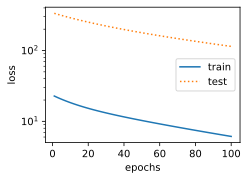

weight:  [[ 2.1466887 ]
 [-0.02943493]
 [ 1.4349549 ]] 
bias:  [1.203583]


In [26]:
fit_and_plot(
    X[:5, :], y[:5, :], 
    X[n_train:, :], y[n_train:, :]
)